# Онлай покупки

# Задача

1. Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах (1 балл).
2. Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).
3. Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест 
χ
2
χ 
2
 , ANOVA (2 балла).
4. Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей? (1 балл)
5. Увеличить размер данных простым дублированием до 1_000_000 строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам.

## Информация о наборе данных

Прогнозирование намерений онлайн-покупателей совершить покупку в режиме реального времени с использованием многослойного персептрона и рекуррентных нейронных сетей LSTM

## Описание данных

- Атрибут Revenueможно использовать в качестве метки класса.

- Administrative, Administrative Duration, Informational, Informational Duration, Product Relatedи Product Related Durationпредставляют собой количество различных типов страниц, посещенных посетителем в этом сеансе, и общее время, проведенное в каждой из этих категорий страниц. Значения этих функций выводятся из информации URL страниц, посещенных пользователем, и обновляются в режиме реального времени, когда пользователь выполняет действие, например, переходит с одной страницы на другую.

- Функции Bounce Rate, Exit Rateи Page Value представляют собой метрики, измеряемые "Google Analytics" для каждой страницы на сайте электронной коммерции.
  - Значение Bounce Rate функции для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его ("отказ"), не вызывая никаких других запросов к серверу аналитики в течение этого сеанса.
  - Значение функции "Exit Rate" для конкретной веб-страницы рассчитывается как для всех просмотров страницы, процент, которые были последними в сеансе.
  - Функция Page Valueпредставляет собой среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции.

- Функция Special Day указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как продолжительность между датой заказа и датой доставки. Например, для Дня святого Валентина это значение принимает ненулевое значение между 2 и 12 февраля, ноль до и после этой даты, если только она не близка к другому особому дню, и максимальное значение 1 8 февраля.

- Набор данных также включает операционную систему, браузер, регион, тип трафика, тип посетителя (повторный или новый), логическое значение, указывающее, является ли дата посещения выходным днем, и месяц года.

# Импорт библиотек и загрузка данных

In [1]:
# обработка данных
import pandas as pd
import numpy as np
import polars as pl
import polars.selectors as cs

# визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.polars

# допы
import warnings
warnings.filterwarnings("ignore")

In [2]:
# ссылка
link_data = 'https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/refs/heads/main/datasets/online_shoppers_intention.csv'

In [3]:
df_pl = pl.read_csv(link_data)

# добавим столбец индекс
# df_pl = df_pl.with_row_index('index')

# Исследование данных

### Общая информация

In [4]:
# первые строки данных
df_pl.head()

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",1,1,1,1,"""Returning_Visitor""",false,false
0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,"""Feb""",2,2,1,2,"""Returning_Visitor""",false,false
0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,"""Feb""",4,1,9,3,"""Returning_Visitor""",false,false
0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,"""Feb""",3,2,2,4,"""Returning_Visitor""",false,false
0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,"""Feb""",3,3,1,4,"""Returning_Visitor""",true,false


In [5]:
# последниые строки данных
df_pl.tail()

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,"""Dec""",4,6,1,1,"""Returning_Visitor""",true,false
0,0.0,0,0.0,5,465.75,0.0,0.021333,0.0,0.0,"""Nov""",3,2,1,8,"""Returning_Visitor""",true,false
0,0.0,0,0.0,6,184.25,0.083333,0.086667,0.0,0.0,"""Nov""",3,2,1,13,"""Returning_Visitor""",true,false
4,75.0,0,0.0,15,346.0,0.0,0.021053,0.0,0.0,"""Nov""",2,2,3,11,"""Returning_Visitor""",false,false
0,0.0,0,0.0,3,21.25,0.0,0.066667,0.0,0.0,"""Nov""",3,2,1,2,"""New_Visitor""",true,false


In [6]:
# случайные пять строк данных
df_pl.sample(5)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
4,65.5,0,0.0,23,783.75,0.007692,0.030769,0.0,0.0,"""Nov""",2,5,3,1,"""Returning_Visitor""",true,true
0,0.0,0,0.0,21,864.458333,0.003175,0.010317,0.0,0.0,"""Dec""",3,2,1,2,"""New_Visitor""",false,false
2,49.8,0,0.0,41,857.266667,0.012195,0.0242741,5.850665,0.0,"""Nov""",2,2,1,1,"""Returning_Visitor""",false,false
0,0.0,0,0.0,21,597.333333,0.090476,0.121429,0.0,0.6,"""May""",3,2,1,13,"""Returning_Visitor""",false,false
0,0.0,2,30.666667,13,307.571429,0.013333,0.052778,0.0,1.0,"""May""",1,1,1,2,"""Returning_Visitor""",true,false


In [7]:
# размер данных
df_pl.shape

(12330, 18)

In [8]:
# информация о типах данных
df_pl.schema

Schema([('Administrative', Int64),
        ('Administrative_Duration', Float64),
        ('Informational', Int64),
        ('Informational_Duration', Float64),
        ('ProductRelated', Int64),
        ('ProductRelated_Duration', Float64),
        ('BounceRates', Float64),
        ('ExitRates', Float64),
        ('PageValues', Float64),
        ('SpecialDay', Float64),
        ('Month', String),
        ('OperatingSystems', Int64),
        ('Browser', Int64),
        ('Region', Int64),
        ('TrafficType', Int64),
        ('VisitorType', String),
        ('Weekend', Boolean),
        ('Revenue', Boolean)])

In [9]:
# стат показатели
df_pl.describe()

statistic,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,str,f64,f64
"""count""",12330.0,12330.0,12330.0,12131.0,12330.0,11839.0,12330.0,12231.0,12330.0,12330.0,"""12330""",12330.0,12330.0,12330.0,12330.0,"""12330""",12330.0,12330.0
"""null_count""",0.0,0.0,0.0,199.0,0.0,491.0,0.0,99.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0
"""mean""",2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,null,2.124006,2.357097,3.147364,4.069586,null,0.232603,0.154745
"""std""",3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,null,0.911325,1.717277,2.401591,4.025169,null,null,null
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""Aug""",1.0,1.0,1.0,1.0,"""New_Visitor""",0.0,0.0
"""25%""",0.0,0.0,0.0,0.0,7.0,183.875,0.0,0.014286,0.0,0.0,null,2.0,2.0,1.0,2.0,null,null,null
"""50%""",1.0,7.5,0.0,0.0,18.0,597.625,0.003114,0.025141,0.0,0.0,null,2.0,2.0,3.0,2.0,null,null,null
"""75%""",4.0,93.3,0.0,0.0,38.0,1462.659125,0.016825,0.05,0.0,0.0,null,3.0,2.0,4.0,4.0,null,null,null
"""max""",27.0,3398.75,24.0,2549.375,705.0,63973.52223,0.2,0.2,361.763742,1.0,"""aug""",8.0,13.0,9.0,20.0,"""Returning_Visitor""",1.0,1.0


Из представленной статистики можно сделать несколько выводов о характеристиках данных и поведении пользователей:

Общая информация:

Датасет содержит 12,330 записей.
В колонках informational, productrelated и ExitRates наблюдаются пропущенные значения — 199, 491 и 99 соответственно.

Средние значения и распределение:
- В среднем пользователи просматривают 2.32 страницы административного характера и проводят на них около 80.82 секунд.
- Среднее количество просмотренных информационных страниц — 0.5, с длительностью около 34.72 секунд.
- В среднем пользователи просматривают около 1190.5 страниц с продуктами, затрачивая на них около 31.73 секунд.
- Средний показатель отказов (bouncerates) и показателя выхода (exitrates) составляют 0.022 и 0.043 соответственно, что говорит о довольно низких значениях этих показателей.

Ценностные показатели:
- Показатель pagevalues имеет среднее значение 5.89, что, вероятно, отражает среднюю ценность страниц для целей конверсии.

Распределение по категориям:
- Большинство пользователей — это "Returning_Visitor" (повторные посетители), тогда как "New_Visitor" (новые посетители) встречаются реже.
- Средний трафик варьируется по регионам и типам браузеров.

Специальные дни и выходные:
- specialday имеет среднее значение 0.06, что говорит о небольшой доле посещений в дни со специальными событиями.
- Поле weekend имеет среднее значение 0.154, что указывает на незначительное увеличение посещений в выходные.

Потенциальная корреляция и отклонения:
- Показатель std показывает значительное отклонение по productrelated_duration, что говорит о вариативности длительности пребывания на страницах продуктов.
- Эти данные могут быть полезны для анализа поведения пользователей, определения факторов, влияющих на отказы и конверсии, а также для улучшения структуры сайта.

### Работа с дубликатами

In [10]:
# для определения дубликаов используем unique() к датафрейму, который покажет уникальные данных без дублей
df_pl = df_pl.unique()
df_pl.shape

(12221, 18)

### Работа с пропущенными значениями

In [11]:
# доля пропусков
a = {i: 100 * (df_pl[i].null_count() / df_pl.height) for i in df_pl.columns}
# столбцы только с пропусками
a = {key: value for key, value in a.items() if value > 0}
a

{'Informational_Duration': 1.6283446526470828,
 'ProductRelated_Duration': 4.001309221831274,
 'ExitRates': 0.8100810081008101}

Доля пропусков менее 5%. Попробуем заполнить средним или медианой

In [12]:
# статистика только по столбцам с пропусками
df_pl.select(pl.col(['Informational_Duration', 'ProductRelated_Duration', 'ExitRates'])).describe()

statistic,Informational_Duration,ProductRelated_Duration,ExitRates
str,f64,f64,f64
"""count""",12022.0,11732.0,12122.0
"""null_count""",199.0,489.0,99.0
"""mean""",35.039339,1201.393015,0.041609
"""std""",142.257692,1913.726058,0.046432
"""min""",0.0,0.0,0.0
"""25%""",0.0,191.5625,0.014268
"""50%""",0.0,606.366667,0.025
"""75%""",0.0,1475.166667,0.048718
"""max""",2549.375,63973.52223,0.2


- informational_duration - заполним средним значением
- productrelated_duration и exitrates - медианнным

In [13]:
# замена пропусков на среднее в 'informational_duration' и на медиану в 'productrelated_duration' т 'exitrates'
df_pl = df_pl.with_columns(
    pl.col('Informational_Duration').fill_null(df_pl['Informational_Duration'].mean())
    ,pl.col('ProductRelated_Duration').fill_null(df_pl['ProductRelated_Duration'].median())
    ,pl.col('ExitRates').fill_null(df_pl['ExitRates'].median())
)

In [14]:
# проверка
df_pl.select(pl.col(['Informational_Duration', 'ProductRelated_Duration', 'ExitRates'])).describe()[1]

statistic,Informational_Duration,ProductRelated_Duration,ExitRates
str,f64,f64,f64
"""null_count""",0.0,0.0,0.0


In [15]:
# название столбцов в нижнем регистре
df_pl.columns = [col.lower() for col in df_pl.columns]

In [16]:
# исключение 'traffictype', 'region', 'browser', 'operatingsystems' из df - эти данные не содержат полезной информации
df_pl = df_pl.select(pl.col("*").exclude(['traffictype','region','browser','operatingsystems']))

# Однофакторный анализ

Зачада
- Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной (3 балла).

Предсказание вероятности покупки. Переменная revenue является наиболее подходящей целевой переменной

### Анализ числовых переменных

In [17]:
# столбцы с числовыми данным в переменную
int_df = df_pl.select(pl.col("*").exclude(['month','weekend','revenue','visitortype']))

In [18]:
def visualisation(col_name):
    '''
    футкция выводит основные стат показатели по строит график hist библиотеки hvplot
    '''
    display(f'min - {int_df[col_name].min()}, max - {int_df[col_name].max()}, mean - {int_df[col_name].mean()}, median - {int_df[col_name].median()}')
    return int_df.hvplot.hist(col_name, title=f'распределение данных столбца - {col_name}')

In [19]:
visualisation('administrative')

'min - 0, max - 27, mean - 2.3358153997217905, median - 1.0'

:Histogram   [administrative]   (Count)

In [20]:
visualisation('administrative_duration')

'min - 0.0, max - 3398.75, mean - 81.53943768513312, median - 9.0'

:Histogram   [administrative_duration]   (Count)

In [21]:
visualisation('informational')

'min - 0, max - 24, mean - 0.5080598968987808, median - 0.0'

:Histogram   [informational]   (Count)

In [22]:
visualisation('informational_duration')

'min - 0.0, max - 2549.375, mean - 35.03933857540576, median - 0.0'

:Histogram   [informational_duration]   (Count)

In [23]:
visualisation('productrelated')

'min - 0, max - 705, mean - 32.00507323459619, median - 18.0'

:Histogram   [productrelated]   (Count)

In [24]:
visualisation('productrelated_duration')

'min - 0.0, max - 63973.52223, mean - 1177.5808360706942, median - 606.28333335'

:Histogram   [productrelated_duration]   (Count)

In [25]:
visualisation('bouncerates')

'min - 0.0, max - 0.2, mean - 0.020605492284101138, median - 0.002941176'

:Histogram   [bouncerates]   (Count)

In [26]:
visualisation('exitrates')

'min - 0.0, max - 0.2, mean - 0.04147494845806399, median - 0.025'

:Histogram   [exitrates]   (Count)

In [27]:
visualisation('pagevalues')

'min - 0.0, max - 361.7637419, mean - 5.941784587759758, median - 0.0'

:Histogram   [pagevalues]   (Count)

In [28]:
visualisation('specialday')

'min - 0.0, max - 1.0, mean - 0.06186073152769823, median - 0.0'

:Histogram   [specialday]   (Count)

Визуально можно наблюдать об отсутствии нормального распределения. Наблюдаем длинный хвосты в данных колонок 'pagevalues','productrelated_duration','productrelated', 'informational_duration', 'informational', 'administrative_duration', 'administrative',  что может говорить о выбросах.

### Анализ категориальных переменных

Посмотрим на uniq

In [29]:
for i in df_pl.select(cs.string()):
    print(i.unique().to_list())

['May', 'Dec', 'June', 'Oct', 'aug', 'Aug', 'Sep', 'Jul', 'Feb', 'Nov', 'Mar']
['Other', 'Returning_Visitor', 'New_Visitor']


В колонке 'month' есть данные "aug" - поменяем их на "Aug"

In [30]:
# Замена значений
df_pl = df_pl.with_columns(pl.col('month').replace('aug','Aug'))

In [31]:
# проверка
for i in df_pl.select(cs.string()):
    print(i.unique().to_list())

['May', 'June', 'Feb', 'Sep', 'Dec', 'Oct', 'Nov', 'Aug', 'Mar', 'Jul']
['Returning_Visitor', 'Other', 'New_Visitor']


In [32]:
# столбцы с категориальными данными в переменную
cat_df = df_pl.select(cs.string())

In [33]:
# график часто встречающихся значений колонки visitortype

# группировка
visitortype_group = cat_df.group_by('visitortype').agg(pl.col('month').count().alias('count')).sort('count',descending=True)
# график
visitortype_group.hvplot.bar(x='visitortype', y='count', title='Частота посещения клиентами по месяцам', width=500)

:Bars   [visitortype]   (count)

In [34]:
# график часто встречающихся значений колонки month

# группировка
month_group = cat_df.group_by('month').agg(pl.col('visitortype').count().alias('count')).sort('count',descending=True)
# график
month_group.hvplot.bar(x='month', y='count', title="Частота посещения сайтов по месяцам", width=700)

:Bars   [month]   (count)

### Связь с целевой переменной

- целевая переменная 'revenue'

посмотри связб целевой переменной с такими данными как 'month' и 'specialday'. Данные в столбце specialday можно отнести к категориальным, так как значения показывают близось к праздничному дню 

Влияние месяца на покупку

In [35]:
# pivot
revenue_by_month_pivot = df_pl.pivot('revenue', index='month',values='weekend', aggregate_function='count')
# грфик
revenue_by_month_pivot.hvplot.bar(x='month', y=['false','true'], title="Влияние месяца на покупку", color=["red","green"], rot=90)

:Bars   [month,Variable]   (value)

Можно наблюдать, что посетители сайтов чаще отказываются от покуки чем приобритают

Влияние близость паздничного дна на покупку

In [36]:
# pivot
specialday_by_month_pivot = df_pl.pivot('revenue', index='specialday', values='weekend', aggregate_function='count').sort('specialday')
# грфик
specialday_by_month_pivot.hvplot.bar(x='specialday'
                                     ,y=['false','true']
                                     ,title="Влияние близость праздничного для на покупку"
                                     ,color=["red","green"]
                                     ,rot=90)

:Bars   [specialday,Variable]   (value)

Можно наблюдать, что чем ближе день до праздника тем чаще посетители совершают покупки

# Корреляциионный анализ

Корреляцию будем анализировать с помощью библиотеки phik. Она позволяет вычислять корреляции между переменными смешанных типов, учитывая нелинейные зависимости и категориальные признаки. Для оценки по этому коэффициенту нет необходимости преобразовывать категориальные признаки в дамми-переменные.

In [37]:
import phik

Поскольку phik не поддерживает Polars DataFrame, создадим функцию, которая преобразует данные в Pandas DataFrame и выполнит все вычисления. На выходе мы получим тепловую карту.

In [38]:
def phik_matris(df, data_types):
    '''
    Функция для расчета корреляции с использованием библиотеки phik. Она преобразует Polars DataFrame в Pandas DataFrame, вычисляет матрицу корреляций и выводит график тепловой карты (heatmap)
    '''
    # преобразование данные в df pandas
    df = df_pl.to_pandas()
    # список интервальных переменных. на вход подаем dict с типами переменными
    interval_cols_pl = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
    # Матрица корреляции
    corrilations = df[df.columns].phik_matrix(interval_cols = interval_cols_pl)
    # график
    plt.figure(figsize=(8,8))
    sns.heatmap(corrilations
            ,vmax=1
            ,square=True
            ,annot=True
            ,cmap='coolwarm'
            ,center=0
            ,annot_kws={'size':8})
    plt.title('Матрица корреляции')
    return plt.show()

Назанчение каждой переменной тип. phik тожет автоматически выводить типы переменных, но рекомендуется назначать тип самостоятельно

In [39]:
data_types = {'administrative':'ordinal'
              ,'administrative_duration':'interval'
              ,'informational':'ordinal'
              ,'informational_duration':'interval'
              ,'productrelated':'ordinal'
              ,'productrelated_duration':'interval'
              ,'bouncerates':'ordinal'
              ,'exitrates':'interval'
              ,'pagevalues':'interval'
              ,'specialday':'ordinal'
              ,'month':'ordinal'
              ,'visitortype':'categorical'
              ,'weekend':'ordinal'
              ,'revenue':'ordinal'
            }

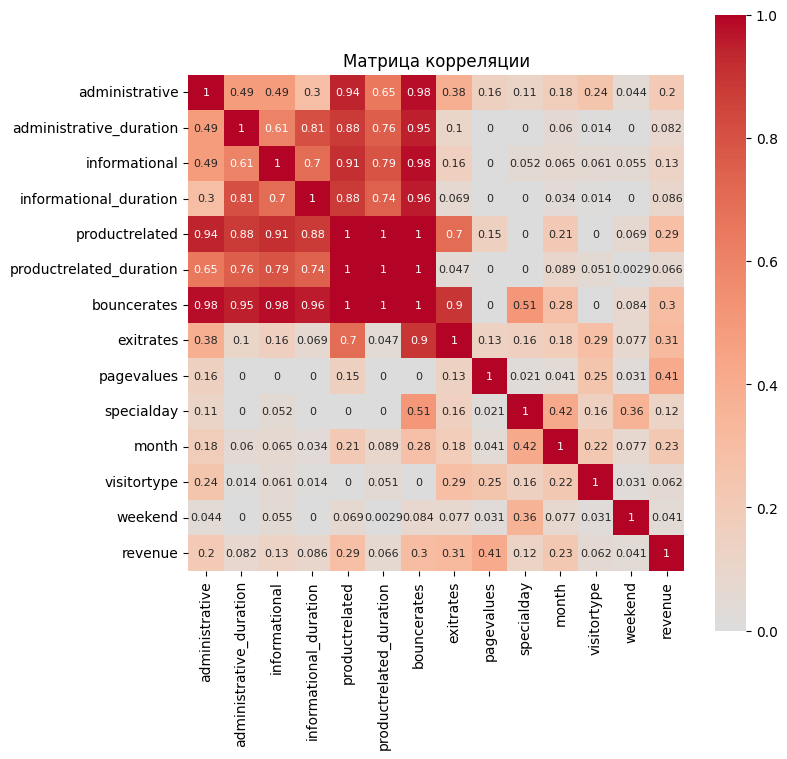

In [40]:
# вычисление корреляции
phik_matris(df_pl,data_types)

Целевая переменная «revenue» имеет довольно сильную корреляцию с переменной «pagevalues» (значения страниц) - 0.41. Это может свидетельствовать о том, что информация, представленная на веб-страницах, важна для принятия положительного решения о покупке. Также наблюдается значительная корреляция с переменной «exitrate» (показатель выхода) - 0.31, что неудивительно, поскольку большинство посетителей сайта обычно не совершают покупку.

# Анализ целевой переменной

In [41]:
# график распределения целевой переменной
df_pl.group_by('month').agg(pl.col('revenue').sum()).hvplot.bar(x='month', y='revenue', title=f'распределение данных столбца - revenue')

:Bars   [month]   (revenue)

так как тип данных целевой переменной bool, то возможны сложномти именнос с этим типом данных при обучение модели